Cluster Assignments: [0 0 2 1 0 1 2 1 2 2 2 1 2 2 0 2 0 1 2 2 2 2 1 0 2 0 0 1 1 2 2 2 0 2 0 2 0
 1 0 1 1 2 0 1 2 2 0 1 0 1 1 0 0 2 0 1 0 2 1 2 0 1 1 0 0 1 1 0 0 2 1 0 0 2
 2 0 0 1 2 1 2 2 0 2 1 0 0 2 1 2 0 2 0 2 2 0 0 2 0 0 1 2 1 2 2 2 2 2 1 0 1
 2 2 2 2 1 0 1 0 1 1 1 2 0 0 0 0 2 0 0 2 2 2 2 2 1 1 0 2 0 2 2 0 2 1 1 1 2
 1 2 2 0 1 0 2 1 1 0 0 2 2 0 0 0 2 0 1 2 2 2 2 2 1 2 1 1 1 2 1 1 0 2 0 1 1
 0 1 2 1 1 0 0 1 0 1 1 1 1 2 0 2 2 1 1 2 1 0 0 1 2 2 0 1 1 0 0 0 0 2 0 0 1
 0 0 2 1 0 0 1 2 2 0 2 0 1 1 0 1 0 0 0 1 1 2 0 1 1 1 0 1 0 1 0 1 1 0 1 2 0
 2 2 2 0 2 1 1 0 1 1 2 2 1 1 1 0 0 0 2 2 2 1 1 1 1 0 1 0 1 1 0 2 1 1 2 0 2
 1 2 0 0]
Final Centroids: [[-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]
 [-2.63323268  9.04356978]]


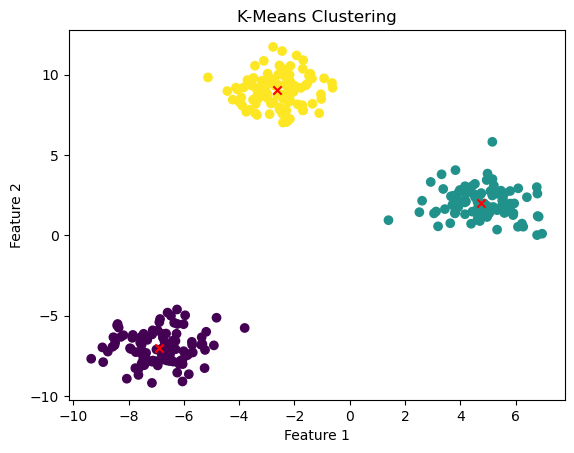

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

    def _assign_labels(self, X):
        # Compute distances from each data point to centroids
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        
        # Assign labels based on the nearest centroid
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

# Generate synthetic data using sklearn.datasets.make_blobs
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Create a K-Means instance with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans._assign_labels(X)

print("Cluster Assignments:", labels)
print("Final Centroids:", kmeans.centroids)


plt.scatter(X[:, 0], X[:, 1], c=labels)

# Plot centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x',label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()